In [1]:
#kernel density estimation plots
#In statistics, kernel density estimation (KDE) is a non-parametric 
#way to estimate the probability density function of a random variable
url = 'https://en.wikipedia.org/wiki/Kernel_density_estimation'

In [2]:
#standard import 
import numpy as np
import pandas as pd
from numpy.random import randn

#import the stats library from numpy
from scipy import stats

#plotting modules and libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#to see our imports in ipython notebook
%matplotlib inline 

In [3]:
dataset = randn(25)

(0, 1)

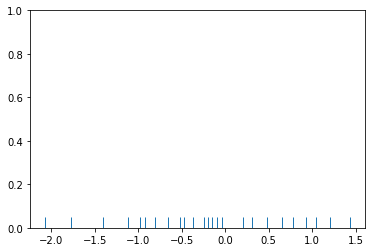

In [4]:
sns.rugplot(dataset)
plt.ylim(0,1)

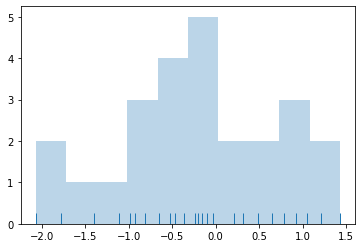

In [5]:
#counting the number of pix in each bin and than plotting the bar height
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

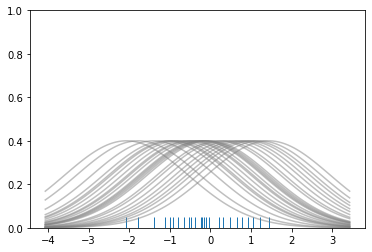

In [6]:
sns.rugplot(dataset)
x_min = dataset.min()-2
x_max = dataset.max()+2
x_axis = np.linspace(x_min,x_max,100)
#practical estimation of the bandwith 

#If Gaussian basis functions are used to approximate univariate data, 
#and the underlying density being estimated is Gaussian, the optimal choice for h 
#(that is, the bandwidth that minimises the mean integrated squared error) is[fig.20]
#where sigma is the standard deviation of the samples.

bandwidth = ((4*dataset.std())**5/(3*len(dataset)))**0.2
kernel_list = []
for data_point in dataset:
    #create a kernel for each point and append it to the kernel list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis function')

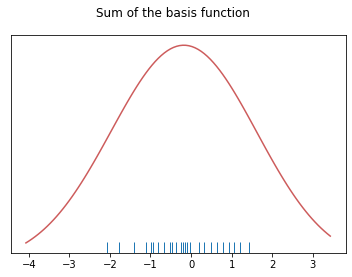

In [7]:
#now we sum the kernels
sum_of_kde = np.sum(kernel_list, axis = 0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)

plt.yticks([])
plt.suptitle("Sum of the basis function")

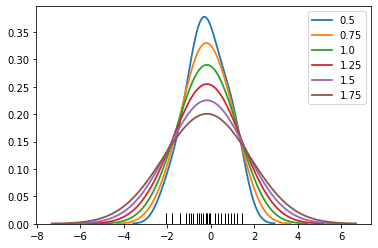

In [8]:
#specify particular bandwiths now! 
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [9]:
#you can use different kernel functions in seaborn 
url = 'https://en.wikipedia.org/wiki/Kernel_(statistics)'

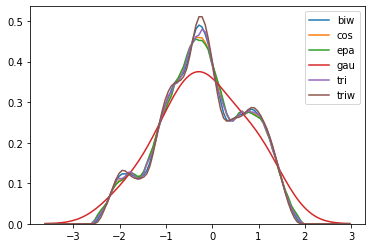

In [10]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

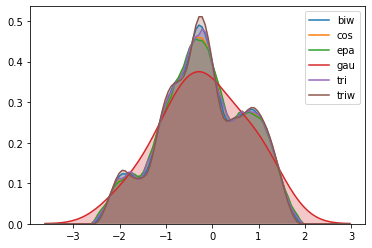

In [11]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern, shade=True)

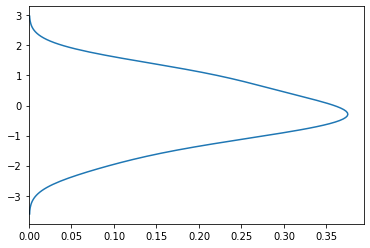

In [12]:
#plot over the vertical axes is also possible
sns.kdeplot(dataset,vertical=True)

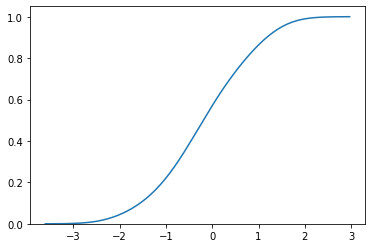

In [13]:
url = 'https://en.wikipedia.org/wiki/Cumulative_distribution_function'
sns.kdeplot(dataset,cumulative=True)

In [14]:
#we can also plot multidimensional data (values in x and y from dataframe)

/Users/aldo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


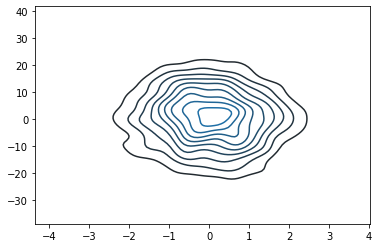

In [15]:
#coviariance is one statistical measure to analyze the linear relationship between two variables
#coviariance, correlation and linear regression are related 

mean = [0,0] #center of data
cov = [[1,0],[0,100]] # set the covariance 


dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2, columns=['X','Y'])
dframe
sns.kdeplot(dframe)

In [16]:
dframe

,X,Y
0,0.784953,4.426611
1,0.567299,3.498616
2,0.216167,-4.723383
3,-2.557662,8.791175
4,0.979198,-17.024334
5,0.815776,-10.549480
6,0.035818,2.171918
7,-0.351127,-31.112250
8,0.264293,-11.000625
9,0.505363,-15.969825


In [17]:
dataset2

array([[ 0.78495266,  4.42661067],
       [ 0.5672991 ,  3.49861642],
       [ 0.21616684, -4.72338288],
       ...,
       [-0.53203956, -5.8928394 ],
       [-0.29679327,  2.63374752],
       [ 0.88909931,  8.30186145]])

In [18]:
cov

[[1, 0], [0, 100]]

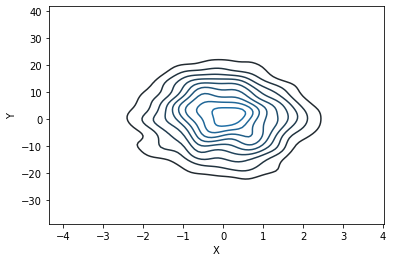

In [19]:
sns.kdeplot(dframe.X,dframe.Y)

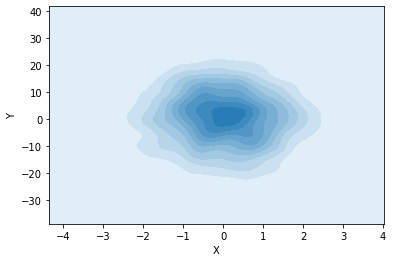

In [20]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

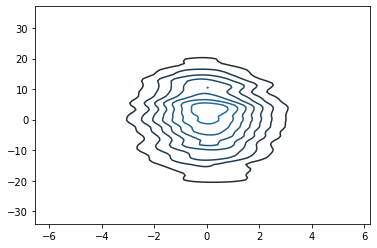

In [21]:
sns.kdeplot(dframe,bw=1) #see the  variable change

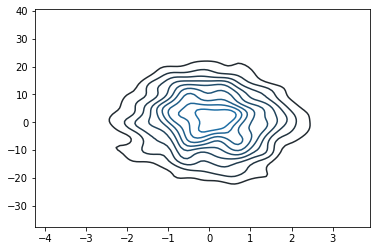

In [22]:
sns.kdeplot(dframe,bw='silverman')

In [23]:
#create kernel density estimation plot for a joint plot

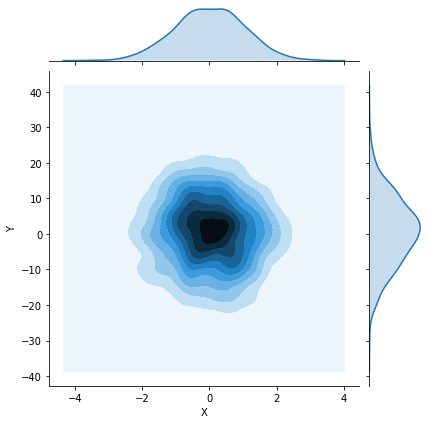

In [24]:
sns.jointplot('X','Y',dframe,kind='kde')